# EDA

In this notebook we explore our dataset

# 1. Import libraries

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [58]:
df = pd.read_csv("../data/combined_X_y.csv")

In [59]:
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


## 3.1 Check data characteritics:

In [60]:
def get_data_char(df):
    data_columns = df.columns
    data_char_df = pd.DataFrame(df.dtypes, columns = ["d_type"])
    data_char_df["#_records"] = df.shape[0] - df.isna().sum()
    data_char_df["#_missing"] = df.isna().sum()
    data_char_df["%_missing"] = df.isna().sum() * 100 / df.shape[0]
    data_char_df["#_unique"] = df.nunique()
    data_char_df["%_unique"] = df.nunique() * 100 / df.shape[0]
    data_char_df["most_frequent"] = df.mode().loc[0]

    def get_stats_stats(df):
        return df.select_dtypes(include = "number").aggregate([min, max, "mean", "median", "std"]).T

    data_char_df = pd.concat([data_char_df,get_stats_stats(df), df.loc[:2,].T], axis = 1)

    return data_char_df
display(get_data_char(df).style.background_gradient(subset = ["#_unique", "std", "median", "mean", "max", "min", "%_missing"], cmap = "Oranges"))

,d_type,#_records,#_missing,%_missing,#_unique,%_unique,most_frequent,min,max,mean,median,std,0,1,2
HighBP,int64,253680,0,0.000000,2,0.000788,0,0.000000,1.000000,0.429001,0.000000,0.494934,1,0,1
HighChol,int64,253680,0,0.000000,2,0.000788,0,0.000000,1.000000,0.424121,0.000000,0.494210,1,0,1
CholCheck,int64,253680,0,0.000000,2,0.000788,1,0.000000,1.000000,0.962670,1.000000,0.189571,1,0,1
BMI,int64,253680,0,0.000000,84,0.033113,27,12.000000,98.000000,28.382364,27.000000,6.608694,40,25,28
Smoker,int64,253680,0,0.000000,2,0.000788,0,0.000000,1.000000,0.443169,0.000000,0.496761,1,1,0
Stroke,int64,253680,0,0.000000,2,0.000788,0,0.000000,1.000000,0.040571,0.000000,0.197294,0,0,0
HeartDiseaseorAttack,int64,253680,0,0.000000,2,0.000788,0,0.000000,1.000000,0.094186,0.000000,0.292087,0,0,0
PhysActivity,int64,253680,0,0.000000,2,0.000788,1,0.000000,1.000000,0.756544,1.000000,0.429169,0,1,0
Fruits,int64,253680,0,0.000000,2,0.000788,1,0.000000,1.000000,0.634256,1.000000,0.481639,0,0,1
Veggies,int64,253680,0,0.000000,2,0.000788,1,0.000000,1.000000,0.811420,1.000000,0.391175,1,0,0


## Insight:
1. There are varibles such as Age, Income that have been preprocessed. These varibled have been bucketed, thus instead of being a continuous varibles these are categorical.
2. Out of 21 features, BMI is the only continous variable available. 
3. There is no missing value in the entire dataset.
4. Among the 20 categorical features, there are just 6 features that have more than 2 categories. These are: GenHlth	MentHlth	PhysHlth Education	Income and Age, rest 14 are binary in nature.
5. The dataset is highly imbalanced with 13.9% of the population having positive case of diabetes.

## 3.2 Check duplicated vakues

In [61]:
duplicates = df[df.duplicated()]
print("Duplicate Rows : ",duplicates.shape[0], duplicates.shape[0]/df.shape[0]*100)
duplicates.head()

Duplicate Rows :  24206 9.541942604856512


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
1242,1,1,1,27,1,0,0,0,0,1,...,0,5,0,30,1,0,10,4,5,1
1563,0,0,1,21,1,0,0,1,1,1,...,0,1,0,0,0,0,4,6,8,0
2700,0,0,1,32,0,0,0,1,1,1,...,0,2,0,0,0,0,5,6,8,0
3160,0,0,1,21,0,0,0,1,1,1,...,0,1,0,0,0,0,4,6,8,0
3332,0,0,1,24,0,0,0,1,1,1,...,0,1,0,0,0,1,9,6,8,0


### Insight:
There are a total of 24206 which is nearly 9.54% of the dataset.

In [62]:
# Dropping duplicates
print("Shape before dropping duplicates : ", df.shape[0])
df.drop_duplicates(inplace = True)
print("Shape after dropping duplicates : ", df.shape[0])

Shape before dropping duplicates :  253680
Shape after dropping duplicates :  229474


# 4. Taking a glance at the questionaire:

1. **HighBP:** Are you currently taking medicine for your high blood pressure? 
2. **HighChol:** Have you EVER been told by a doctor, nurse, or other health professional that your blood cholesterol is high?
3. **CholCheck:** Blood cholesterol is a fatty substance found in the blood. Have you ever had your blood cholesterol checked?
4. **BMI:**  Body mass index
5. **Smoker:** Have you smoked at least 100 cigarettes in your entire life?
6. **Stroke:** Has a doctor, nurse, or other health professional EVER told you that you had a stroke?
7. **HeartDiseaseorAttack:** Has a doctor, nurse, or other health professional EVER told you that you had a heart attack or coronary heart disease?
8. **PhysActivity:** During the past month, other than your regular job, did you participate in any physical activities or exercises?
9. **Fruits:** Do you consume 1 or more fruit servings per day?
10. **Veggies:** Do you consume 1 or more vegetable servings per day?
11. **HvyAlcoholConsump:** Are you a heavy drinker (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)?
12. **AnyHealthcare:** Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, government plans such as Medicare, or Indian Health Service?
13. **NoDocbcCost:** Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
14. **GenHlth:** Would you say that in general your health is: (scale: 1-5, 1 = excellent, 5 = poor) 
15. **MentHlth:** Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
16. **PhysHlth:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
17. **DiffWalk:** Do you have serious difficulty walking or climbing stairs? 
18. **Sex:** What is your sex? 
19. **Age:** What is your age?
20. **Education:** What is the highest grade or year of school you completed?
21. **Income:** What is your annual household income from all sources, reported in US dollars? 
22. **Diabetes:** Has a doctor, nurse, or other health professional EVER told you that have diabetes? 

# 5. Understanding the features:
Many encoding of the categorical values have been taken from the BRFSS (https://www.icpsr.umich.edu/web/NAHDAP/studies/34085/datadocumentation#)
1. HighBP: Binary

Education:
Category | Interpretation
1	Never attended school or only kindergarten
2	Grades 1 - 8 (Elementary)
3	Grades 9 - 11 (Some high school)
4	Grade 12 or GED (High school graduate)
5	College 1 year to 3 years (Some college or technical school)
6	College 4 years or more (College graduate)

Age:
Category | Interpretation
1	Age 18 - 24
2	Age 25 to 29
3	Age 30 to 34
4	Age 35 to 39
5	Age 40 to 44
6	Age 45 to 49
7	Age 50 to 54
8	Age 55 to 59
9	Age 60 to 64
10	Age 65 to 69
11	Age 70 to 74
12	Age 75 to 79
13	Age 80 or older


Income:
Category | Interpeation:
4 Less than $25,000 
3 Less than $20,000 
2 Less than $15,000 
1 Less than $10,000 
5 Less than $35,000 
6 Less than $50,000 
7 Less than $75,000 
8 $75,000 or more

# 6. EDA

## 6.1. Univariate:


In [85]:
y = df["Diabetes_binary"]
y = y.rename("Diabetes")
X = df.drop("Diabetes_binary", axis = 1)

Diabetes
0    0.847055
1    0.152945
Name: proportion, dtype: float64


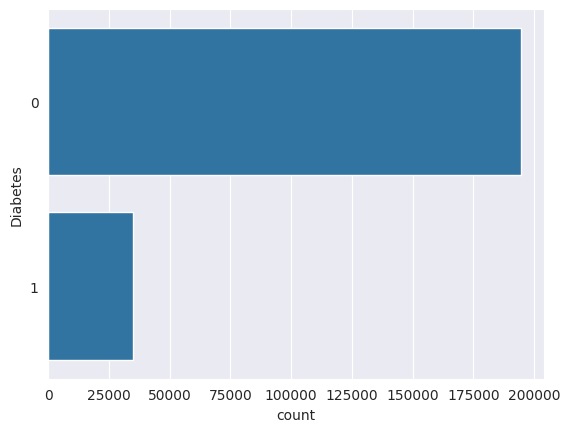

In [86]:
print(y.value_counts(normalize=True))
sns.countplot(y = y);

#### Insight: 
There's an imbalance, favouring to the negative cases of diabetes. We will need to use better evalution metrics to ensure a robust model, like F1-score, precision, recall, AUC-ROC

In [65]:
# Create a list of numerical and categorical columns:

numerical_cols = ["BMI"]
cat_cols = list(set(X.columns) - set(numerical_cols))
cat_cols

['Stroke',
 'MentHlth',
 'Education',
 'GenHlth',
 'Fruits',
 'PhysActivity',
 'Smoker',
 'DiffWalk',
 'CholCheck',
 'PhysHlth',
 'HighBP',
 'Sex',
 'HvyAlcoholConsump',
 'Age',
 'NoDocbcCost',
 'AnyHealthcare',
 'HeartDiseaseorAttack',
 'Income',
 'HighChol',
 'Veggies']

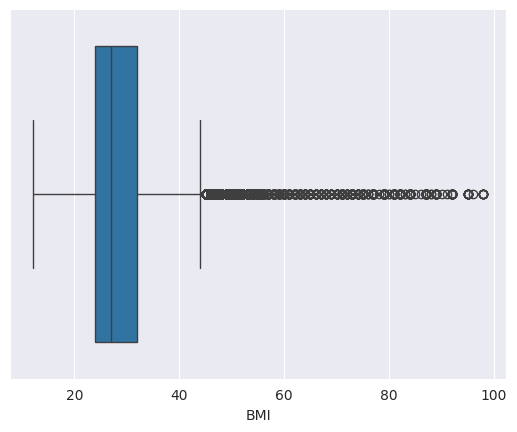

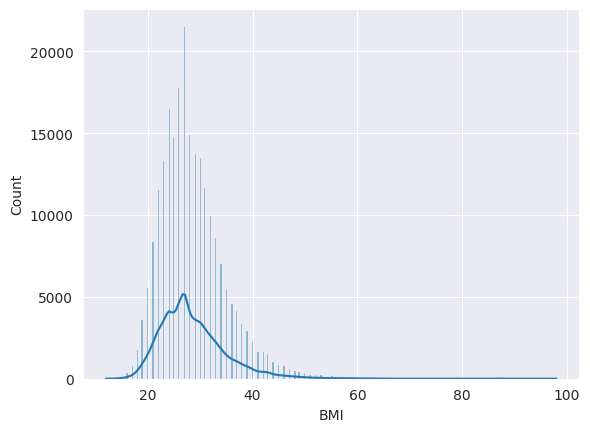

In [66]:
# Plot boxplot and histograms for continuous features

sns.boxplot(data = X, x = "BMI")
plt.show()
sns.histplot(data = X, x = "BMI", kde = True)
plt.show()

#### Insight:
1. BMI has many extreme outliers to the right. We can use winsorization, capping or some transformation to deal with them later.|

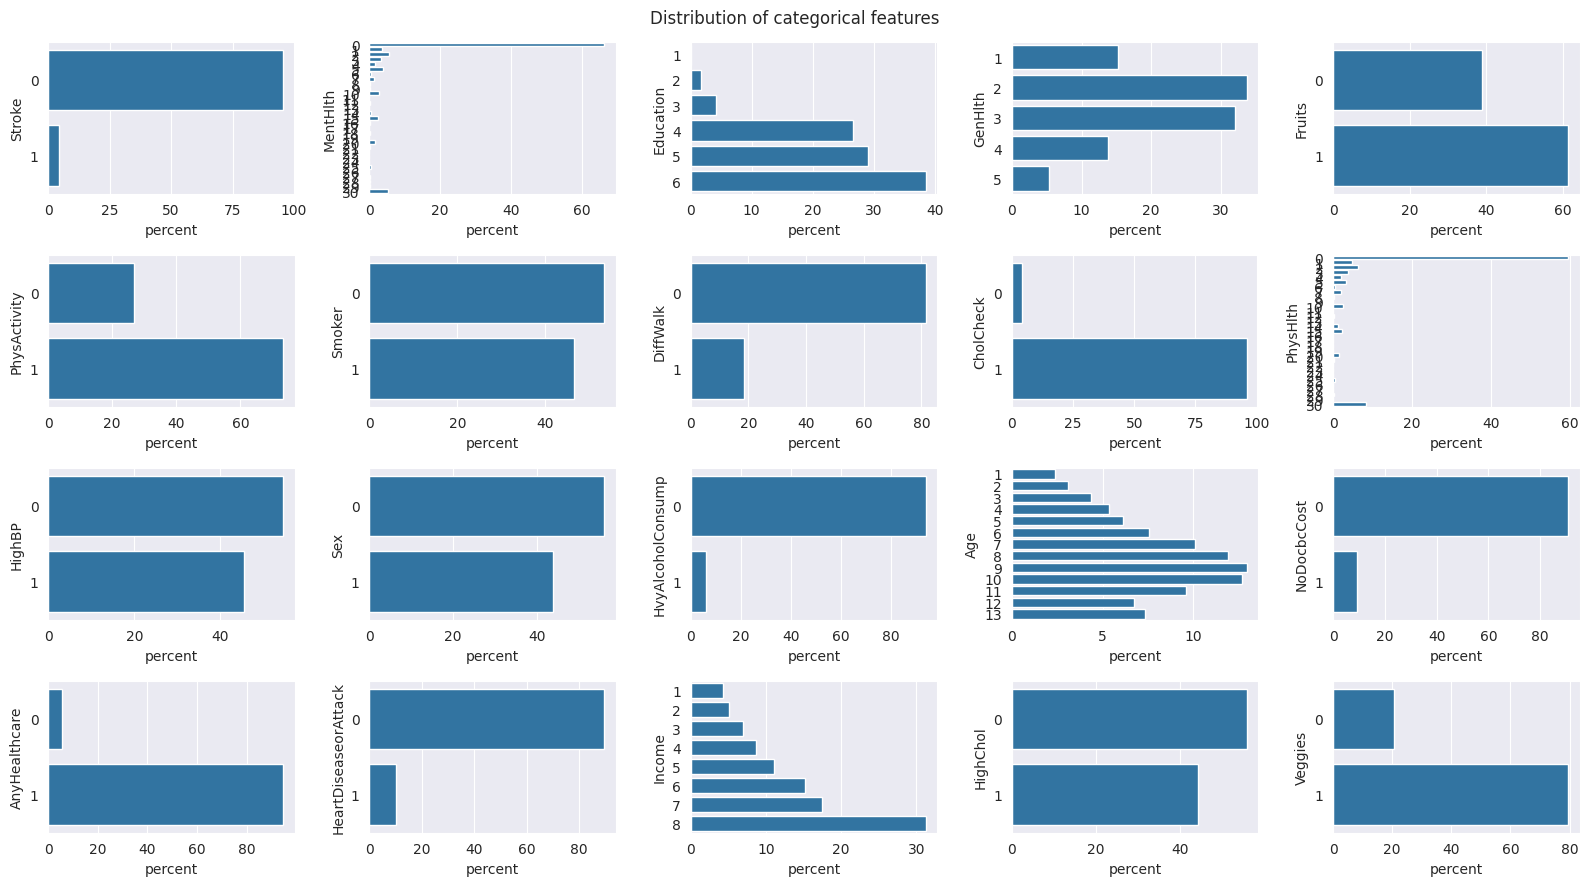

In [77]:
# Plot countplot for categorical features

rows = 4
cols = 5

fig, axes = plt.subplots(rows, cols, figsize = (16,9))
fig.suptitle('Distribution of categorical features')
for i, start in enumerate(cat_cols):
    sns.countplot(data = X,y = cat_cols[i], ax = axes[i//cols, i%cols], stat="percent")
fig.tight_layout()
plt.show();

### Insight:
1. The dataset represents highly eduated group of respondent that have overall good health.
2. Physically activity and difficulty in walking is well managed.
3. Most people belong to the class "8" of Age, which Age 55 to 59.
7. Roughly 45% of the respondents have highBP, HighChol, 95% have any healthcare, these value do come really close to the national average (high BP - , HoghChol - 37%, Healthcare - 92%) (https://www.americashealthrankings.org/explore/measures/High_Chol)
8. Roughly 45% of the respondents are smoker, this is very off from the national average of 19.8% in 2022. (https://www.cdc.gov/tobacco/php/data-statistics/adult-data-cigarettes/index.html)


## 6.2 Bivariate analysis:

<Axes: xlabel='BMI', ylabel='Count'>

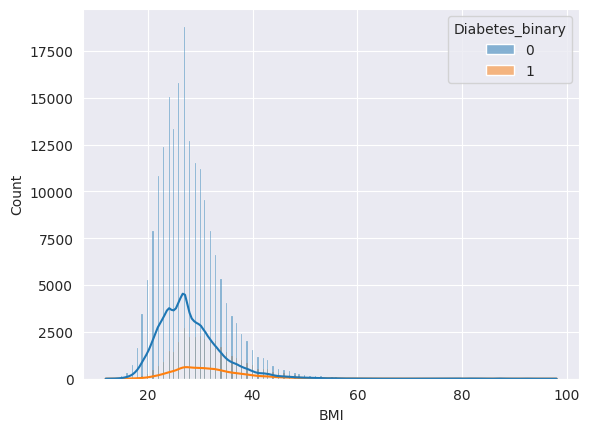

In [70]:
sns.histplot(data = X, x = "BMI", hue = y, kde = True)

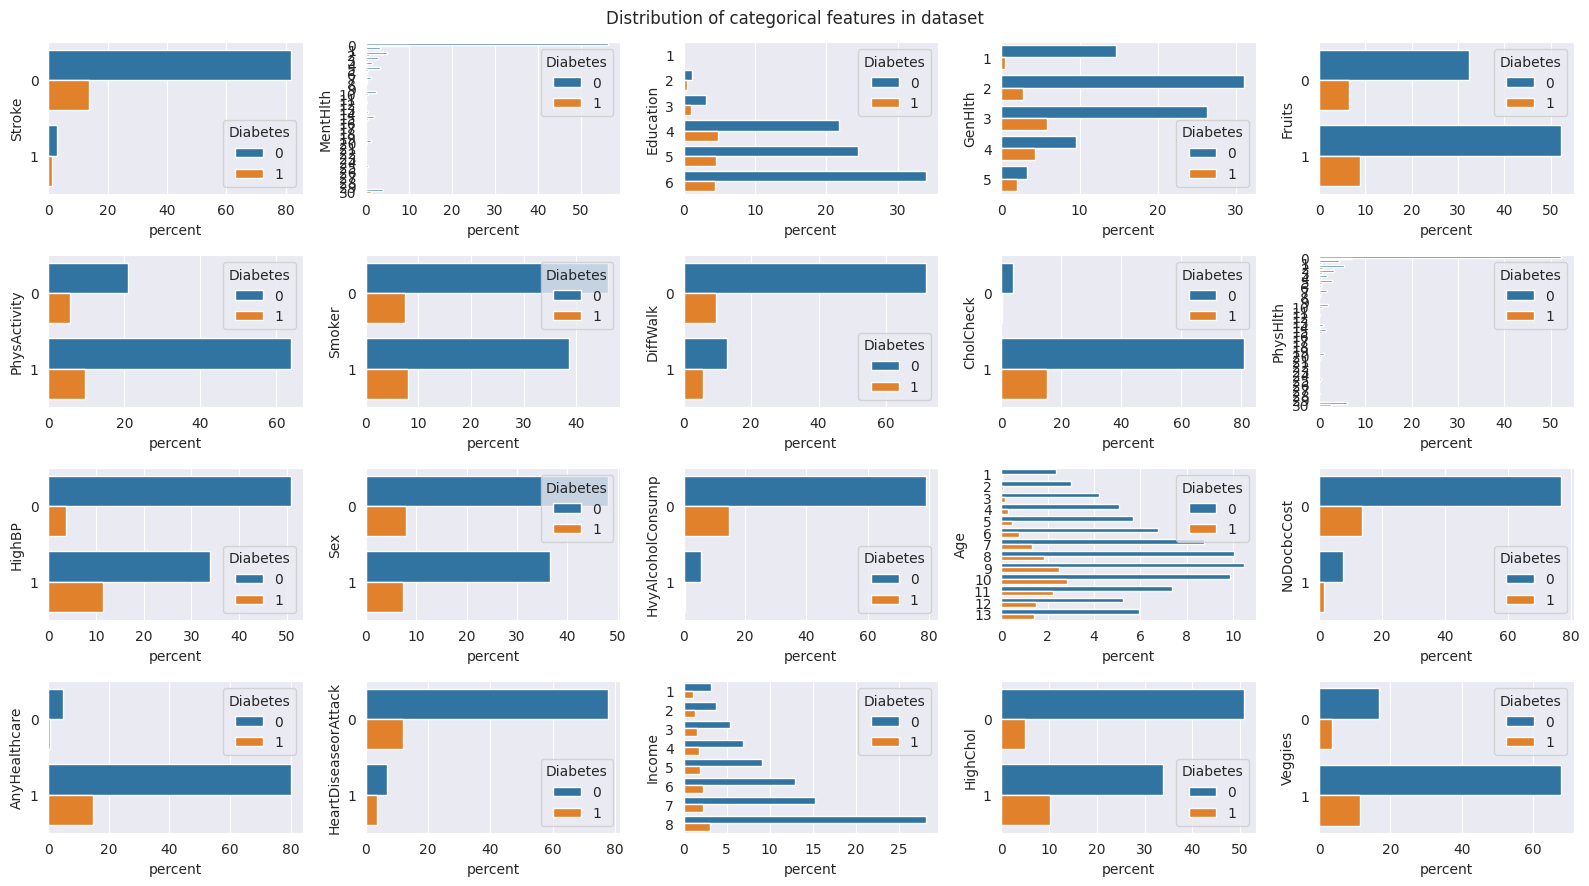

In [87]:
# More countplot withy target variable

rows = 4
cols = 5

fig, axes = plt.subplots(rows, cols, figsize = (16,9))
fig.suptitle('Distribution of categorical features in dataset')
for i, start in enumerate(cat_cols):
    sns.countplot(data = X,y = cat_cols[i], ax = axes[i//cols, i%cols], hue = y, stat="percent")
fig.tight_layout()
plt.plot();